In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0, R0 and V0 .
I0, V0, R0 = 20 , 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - V0 - R0 

In [3]:
# The SIR model differential equations.
def model(y, t, alpha ,beta, gamma, mu, roh,psi, omega):
    S, I, V, R = y
    dSdt = mu*N - beta *S*I - mu *S - omega* S + psi* V  
    dIdt = beta * S*I - mu*I - gamma* I
    dVdt = omega*S - mu*V - psi*V - roh*V
    dRdt = gamma* I - mu* R + roh*V
    return dSdt, dIdt,dVdt, dRdt

Reproduction Number (𝑅0 <= 1)


Reproduction number:  0.4260869565217392


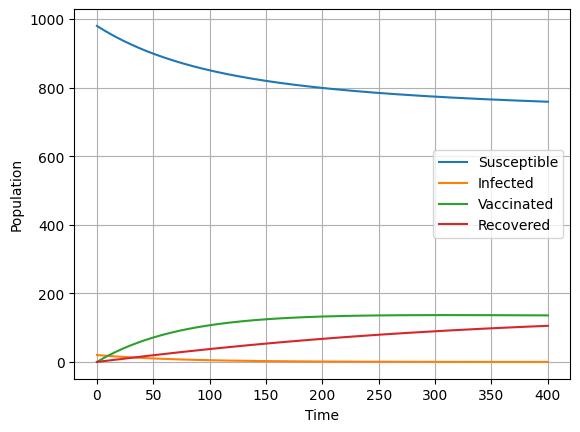

In [4]:
# Model parameters
alpha = 0.003       #Birth Rate
beta = 0.00001      #Infection Rate
omega= 0.002        #Rate of first dose of vacination
gamma= 0.02         #Recovered rate
roh= 0.0033         #Time between first and second dose
psi= 0.005          #first dose wanes in immunity
mu= 0.003           #death rate
n = 400
t = np.linspace(0, n, n)
# Initial conditions vector
y0 = S0, I0, V0, R0
# Integrate the SIR equations over the time grid, t.def 
sol = odeint(model, y0, t, args=(alpha ,beta, gamma, mu, roh, psi, omega))


# Extract the results
S = sol[:, 0]
I = sol[:, 1]
V = sol[:, 2]
R = sol[:, 3]

# Reproduction number (𝑅0 <= 1)

r_0= (beta * S0)/(mu+gamma)
print("Reproduction number: ",r_0)
 


# Plot the results-+


plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, V, label='Vaccinated')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Graph Ploting Function

def plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t):
    sol = odeint(model, y0, t, args=(alpha ,beta, gamma, mu, roh, psi, omega))

    # Extract the results
    s = sol[:, 0]
    i = sol[:, 1]
    v = sol[:, 2]
    r = sol[:, 3]

    # Plot the results
    plt.plot(t, s, label='Susceptible')
    plt.plot(t, i, label='Infected')
    plt.plot(t, v, label='Vaccinated')
    plt.plot(t, r, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()
    return s,i,v,r

Three Cases where the basic reproduction number 𝑅0 is greater than one.
 

 Case1: Two-dose Vaccination Program

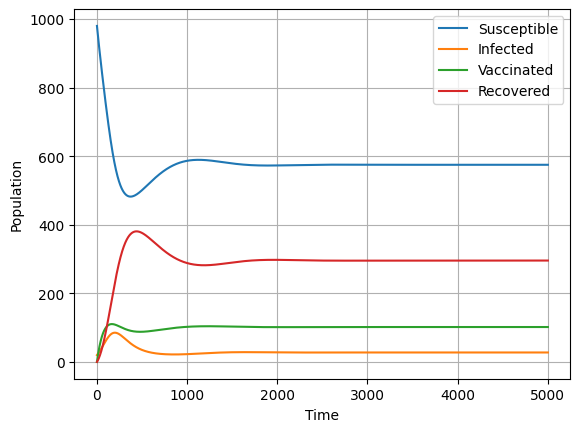

Reproduction number for case 1:  1.704347826086957


In [6]:
# Case1: Two-dose vaccination program

alpha= 0.003      #Birth rate
beta = 0.00004    #Infection per day
omega= 0.002      #Rate of first dose of vacination
gamma= 0.02       #Recovered rate
roh= 0.0033       #Time between first and second dose
psi= 0.005        #first dose wanes in immunity
mu= 0.003         #death rate
n = 5000
t = np.linspace(0, n, n)
S1,I1,V1,R1= plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t)

r_0= (beta * S0)/(mu+gamma)
print("Reproduction number for case 1: ",r_0)

Case 2:  Single Dose Vaccination Program

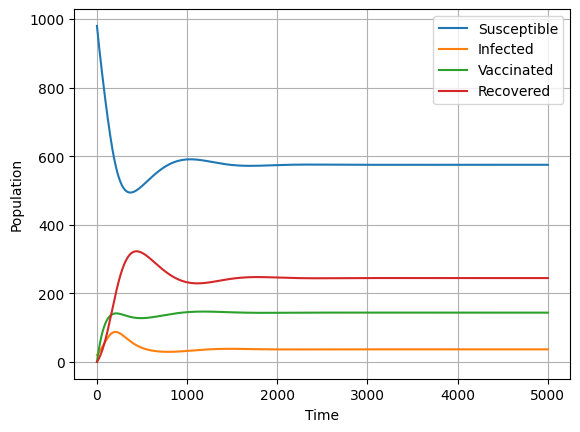

Reproduction number for case 2:  1.704347826086957


In [7]:
# Case 2. Single dose vaccination program.

alpha= 0.003      #Birth rate
beta = 0.00004    #Infection per day
omega= 0.002      #Rate of first dose of vacination
gamma= 0.02       #Recovered rate
roh=0             #Time between first and second dose
psi= 0.005        #first dose wanes in immunity
mu= 0.003         #death rate
n = 5000
t = np.linspace(0, n, n)
S2,I2,V2,R2= plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t)

r_0= (beta * S0)/(mu+gamma)
print("Reproduction number for case 2: ",r_0)

Case 3: Single Dose Vaccination Program With a Small Value of psi

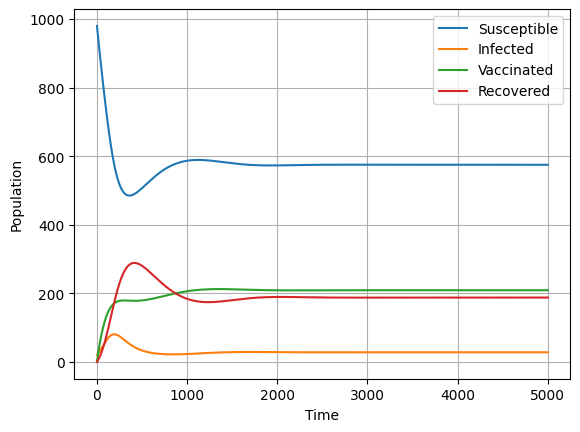

Reproduction number for case 3:  1.704347826086957


In [8]:
# Case 3. Single dose vaccination program with a small value of psi
alpha= 0.003      #Birth rate
beta = 0.00004    #Infection per day
omega= 0.002      #Rate of first dose of vacination
gamma= 0.02       #Recovered rate
roh=0             #Time between first and second dose
psi= 0.0025       #first dose wanes in immunity
mu= 0.003         #death rate
n = 5000
t = np.linspace(0, n, n)
S3,I3,V3,R3= plotgrap(alpha,beta,gamma,mu,roh,psi,omega,t)

r_0= (beta * S0)/(mu+gamma)
print("Reproduction number for case 3: ",r_0)


 Comparative Analysis of Vaccinated Individuals

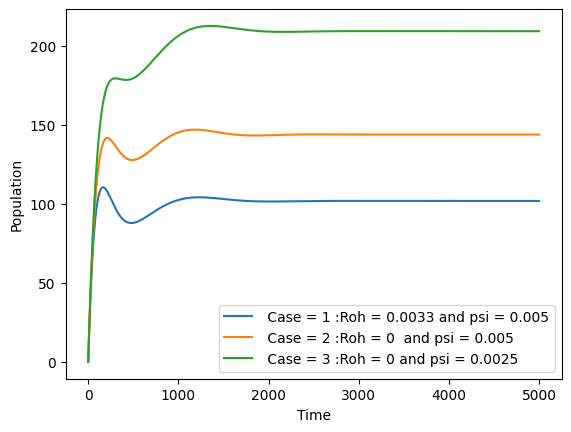

In [9]:
# Comparative analysis of vaccinated individuals
plt.plot(t, V1, label=' Case = 1 :Roh = 0.0033 and psi = 0.005')
plt.plot(t, V2, label=' Case = 2 :Roh = 0  and psi = 0.005')
plt.plot(t, V3, label =' Case = 3 :Roh = 0 and psi = 0.0025' )
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

Comparative Analysis of Infected Individuals

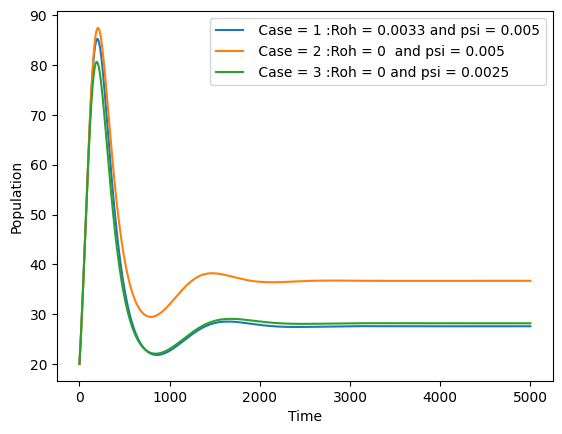

In [10]:
# Comparative analysis of infected individuals
plt.plot(t, I1, label=' Case = 1 :Roh = 0.0033 and psi = 0.005')
plt.plot(t, I2, label=' Case = 2 :Roh = 0  and psi = 0.005')
plt.plot(t, I3, label =' Case = 3 :Roh = 0 and psi = 0.0025' )
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

Comparative Analysis of Susceptible Individuals

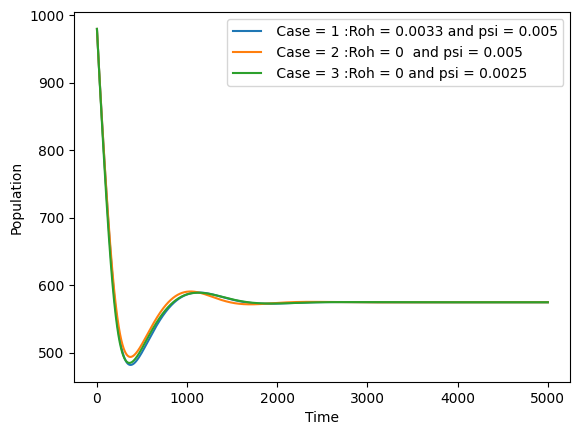

In [11]:
# Comparative analysis of susceptible individuals
plt.plot(t, S1, label=' Case = 1 :Roh = 0.0033 and psi = 0.005')
plt.plot(t, S2, label=' Case = 2 :Roh = 0  and psi = 0.005')
plt.plot(t, S3, label =' Case = 3 :Roh = 0 and psi = 0.0025' )
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

Comparative Analysis of Recovered Individuals

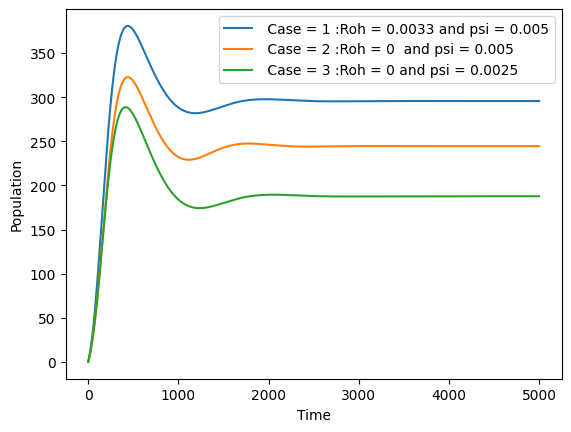

In [12]:
# Comparative analysis of recovered individuals
plt.plot(t, R1, label=' Case = 1 :Roh = 0.0033 and psi = 0.005')
plt.plot(t, R2, label=' Case = 2 :Roh = 0  and psi = 0.005')
plt.plot(t, R3, label =' Case = 3 :Roh = 0 and psi = 0.0025' )
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()